### Machine Learning Project Report

#### Project Title: Smart Student Performance Prediction System

#### Team members: 
- Ahmed Nasr        202200294
- Ahmed Salah       202200212
- Ahmed Fares       202200977
- Hassan Ahmed      202202121

#### Project Description:
- This project is a machine learning project that uses machine learning algorithms to predict student performance based on various factors such as study hours, attendance, and previous academic performance. Utlizing different models and fine tuning the hyperparameters to get the best results from the dataset.

### 0. before pipeline importing the required libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn modules
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Handling Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Settings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

### 1. Data extraction

In [38]:
# Load the dataset
df = pd.read_csv('Term_Project_Dataset_20K.csv')

print(f"Shape: {df.shape}")
print("\nData Info:")
print(df.info())
print("\nDescriptive Statistics:")
display(df.describe())


Shape: (20000, 41)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          19400 non-null  float64
 1   gender                       19400 non-null  object 
 2   parent_income                19400 non-null  float64
 3   num_siblings                 19400 non-null  float64
 4   family_support               19400 non-null  float64
 5   commute_time_min             19400 non-null  float64
 6   part_time_job                19400 non-null  object 
 7   previous_gpa                 19400 non-null  float64
 8   num_failed_courses           19400 non-null  float64
 9   high_school_grade            19400 non-null  float64
 10  math_background_score        19400 non-null  float64
 11  language_background_score    19400 non-null  float64
 12  science_background_score     19400 non-null

,age,parent_income,num_siblings,family_support,commute_time_min,previous_gpa,num_failed_courses,high_school_grade,math_background_score,language_background_score,...,sleep_hours,motivation_level,study_time_per_week,concentration_level,exam_anxiety_level,course_difficulty_rating,teacher_experience_years,class_size,num_prerequisites,final_score
count,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,...,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000,19400.000000
mean,23.478918,18290.515928,2.510361,2.502680,59.318144,2.491322,1.996443,74.902892,49.352577,49.412268,...,6.453149,4.980619,19.614691,4.957680,5.013299,2.997526,20.072680,109.904381,1.996546,66.542747
std,3.452709,30896.118002,1.715978,1.707515,34.796772,0.869089,1.413680,14.425122,28.890298,28.842990,...,2.148505,3.159022,11.485281,3.160975,3.180374,1.409721,11.294943,52.009036,1.412659,11.050014
min,18.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,50.000000,0.000000,0.000000,...,-5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000,25.700000
25%,20.000000,9087.000000,1.000000,1.000000,29.000000,1.730000,1.000000,62.400000,24.000000,24.000000,...,4.700000,2.000000,10.000000,2.000000,2.000000,2.000000,10.000000,65.000000,1.000000,58.800000
50%,23.000000,16102.000000,3.000000,3.000000,59.000000,2.500000,2.000000,74.800000,49.000000,49.000000,...,6.500000,5.000000,20.000000,5.000000,5.000000,3.000000,20.000000,110.000000,2.000000,66.500000
75%,26.000000,23108.500000,4.000000,4.000000,90.000000,3.240000,3.000000,87.400000,74.000000,75.000000,...,8.300000,8.000000,30.000000,8.000000,8.000000,4.000000,30.000000,155.000000,3.000000,74.300000
max,29.000000,596760.000000,5.000000,5.000000,119.000000,4.000000,4.000000,100.000000,99.000000,99.000000,...,10.000000,10.000000,39.000000,10.000000,10.000000,5.000000,39.000000,199.000000,4.000000,100.000000


### 3. EDA


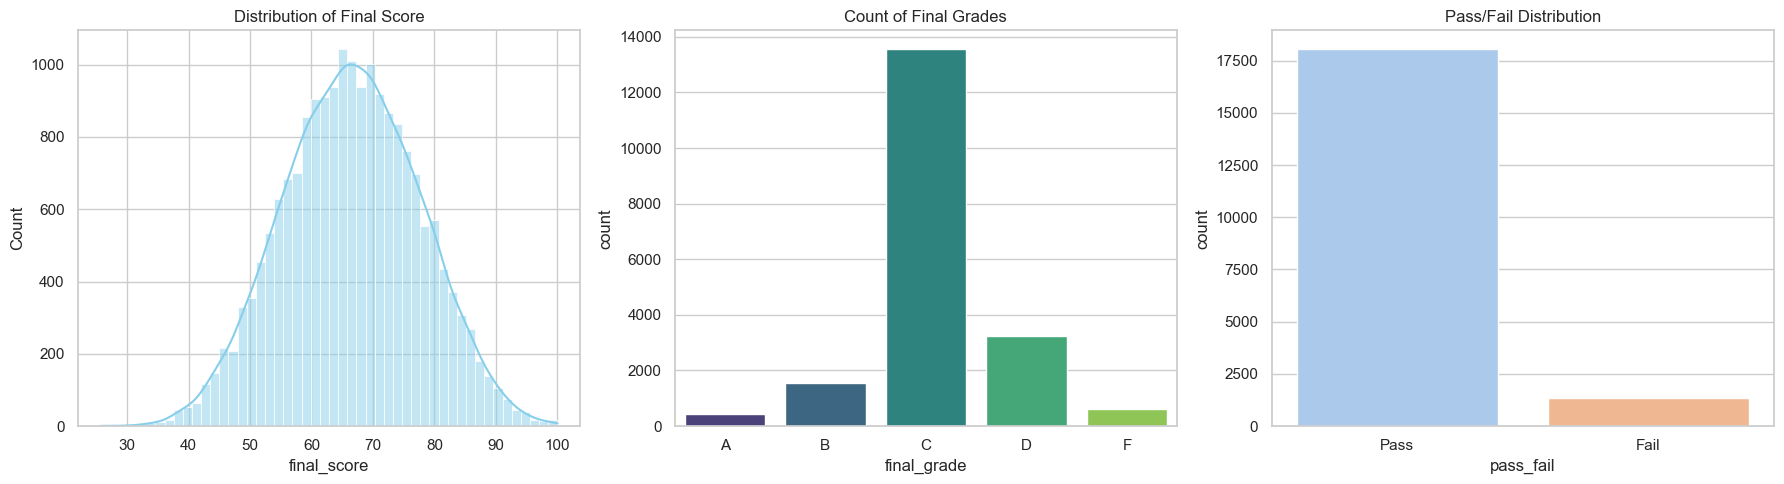

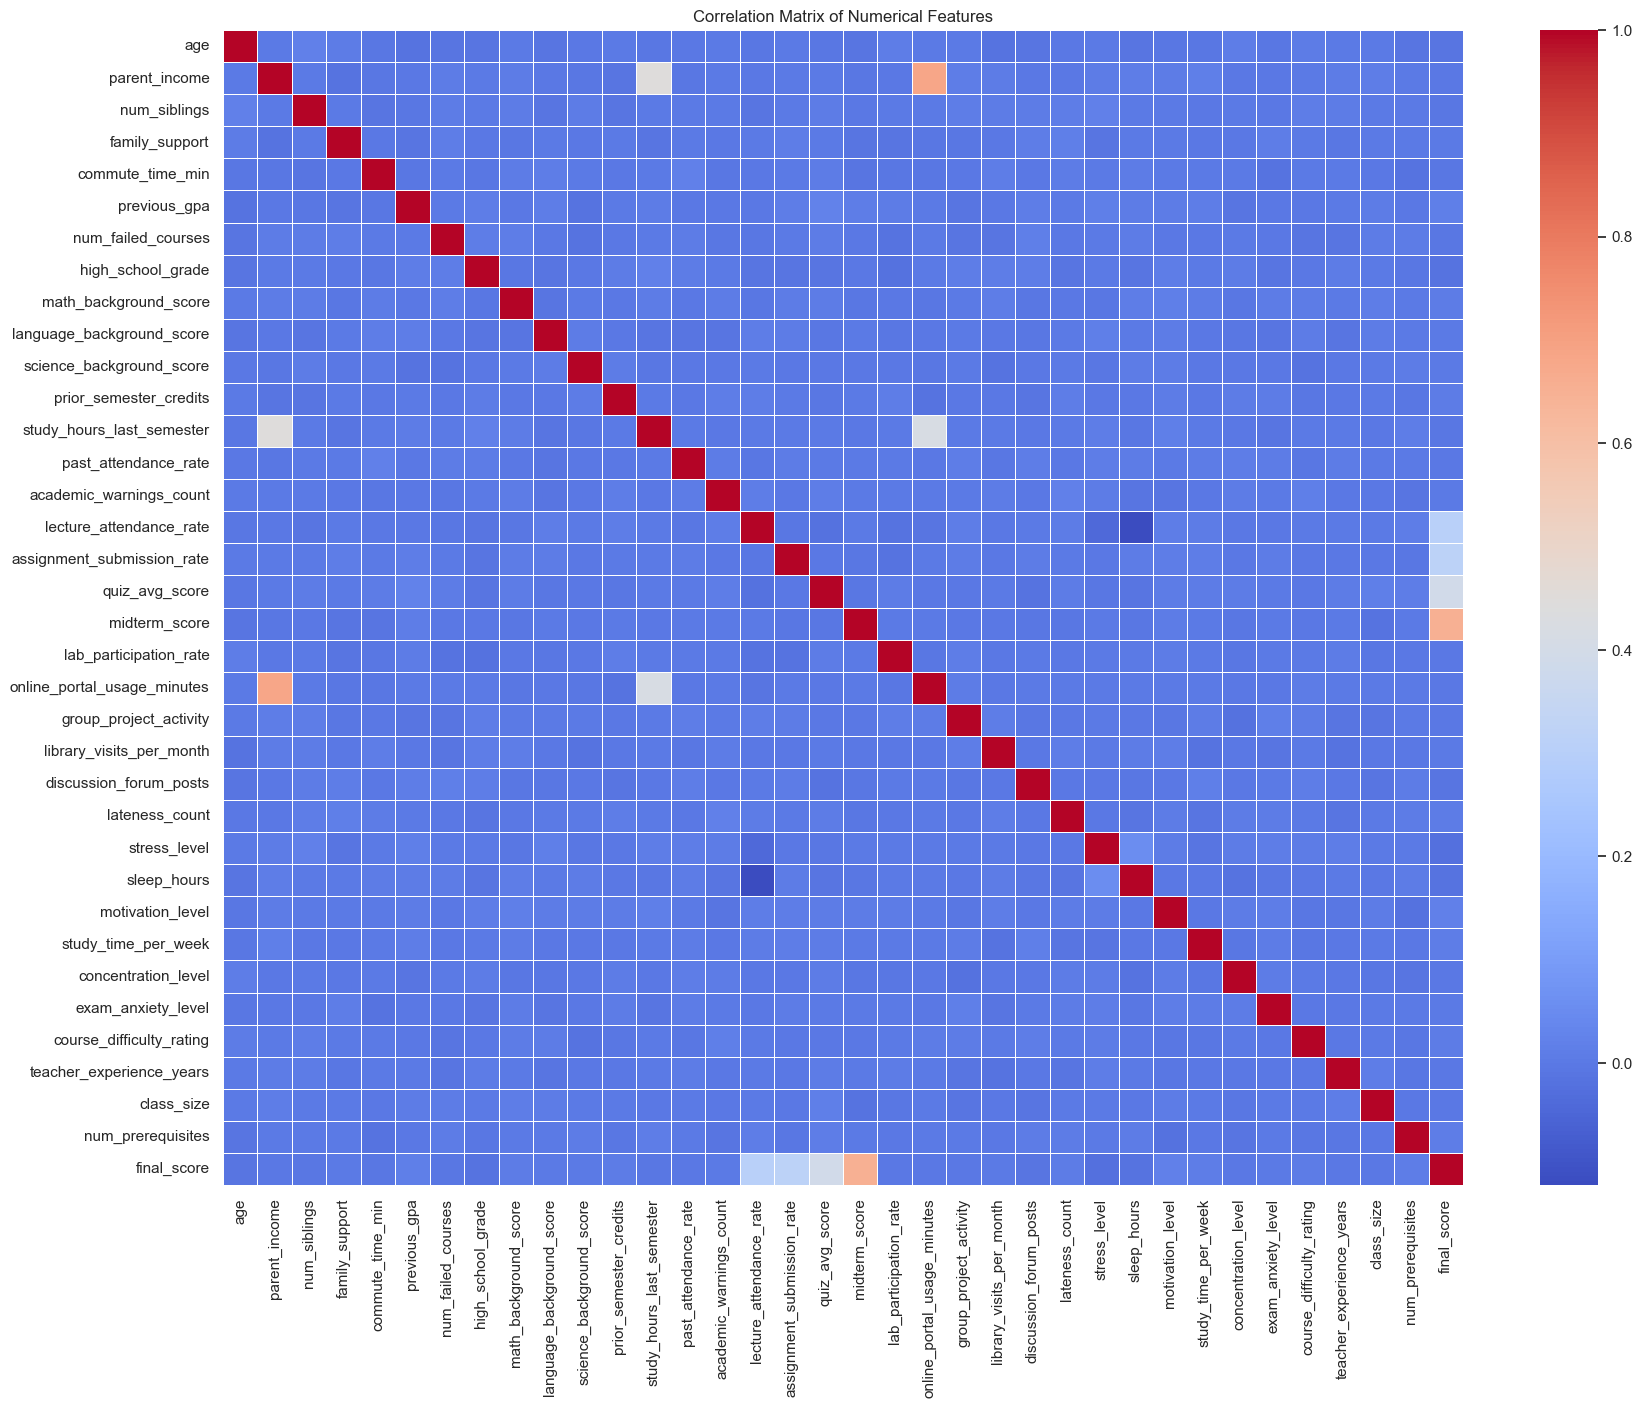


Missing Values Analysis:


,Missing Count,Percentage
age,600,3.0
gender,600,3.0
parent_income,600,3.0
num_siblings,600,3.0
family_support,600,3.0
commute_time_min,600,3.0
part_time_job,600,3.0
previous_gpa,600,3.0
num_failed_courses,600,3.0
high_school_grade,600,3.0


In [39]:
# 1. Distribution of Target Variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Regression Target: Final Score
sns.histplot(df['final_score'], kde=True, bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Final Score')

# Classification Target: Final Grade
sns.countplot(x='final_grade', data=df, ax=axes[1], palette='viridis', order=['A', 'B', 'C', 'D', 'F'])
axes[1].set_title('Count of Final Grades')

# Binary Target: Pass/Fail
sns.countplot(x='pass_fail', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Pass/Fail Distribution')

plt.tight_layout()
plt.show()

# 2. Correlation Matrix (Selecting numerical columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Check for Missing Values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100

print("\nMissing Values Analysis:")
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percent})
display(missing_df[missing_df['Missing Count'] > 0])

### 4. Data PreProcessing
#### 4.1 Handling Missing Values

- We will drop any row who has one of the target variables missing. As it would worsen our analysis and prediction to try and fill in the missing values if we don't even know the target value. But it won't be the same vice versa as we don't want the models to learn based on our guesses.

In [40]:
# Separate features and targets
X = df.drop(columns=['final_score', 'final_grade', 'pass_fail'])
y_reg = df['final_score']
y_clf_multi = df['final_grade']
y_clf_bin = df['pass_fail']

# Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Handling Missing Values
#Categorical Imputation
cat_imputer = SimpleImputer(strategy='most_frequent')

# It models each feature with missing values as a function of other features
num_imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply imputation
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X[categorical_cols]), columns=categorical_cols)
X_num_imputed = pd.DataFrame(num_imputer.fit_transform(X[numerical_cols]), columns=numerical_cols)

X_imputed = pd.concat([X_num_imputed, X_cat_imputed], axis=1)

Categorical Columns: ['gender', 'part_time_job', 'course_type']
Numerical Columns: ['age', 'parent_income', 'num_siblings', 'family_support', 'commute_time_min', 'previous_gpa', 'num_failed_courses', 'high_school_grade', 'math_background_score', 'language_background_score', 'science_background_score', 'prior_semester_credits', 'study_hours_last_semester', 'past_attendance_rate', 'academic_warnings_count', 'lecture_attendance_rate', 'assignment_submission_rate', 'quiz_avg_score', 'midterm_score', 'lab_participation_rate', 'online_portal_usage_minutes', 'group_project_activity', 'library_visits_per_month', 'discussion_forum_posts', 'lateness_count', 'stress_level', 'sleep_hours', 'motivation_level', 'study_time_per_week', 'concentration_level', 'exam_anxiety_level', 'course_difficulty_rating', 'teacher_experience_years', 'class_size', 'num_prerequisites']


#### 4.2 Encoding Categorical Features

In [41]:
cols_to_encode = ['gender', 'part_time_job', 'course_type']
X_encoded = pd.get_dummies(X_imputed, columns=cols_to_encode, drop_first=True)

print("\nData shape after encoding:", X_encoded.shape)
display(X_encoded.head())


Data shape after encoding: (20000, 38)


,age,parent_income,num_siblings,family_support,commute_time_min,previous_gpa,num_failed_courses,high_school_grade,math_background_score,language_background_score,...,study_time_per_week,concentration_level,exam_anxiety_level,course_difficulty_rating,teacher_experience_years,class_size,num_prerequisites,gender_Male,part_time_job_Yes,course_type_Mandatory
0,24.0,22678.000000,0.0,1.0,95.0,2.220000,3.0,99.7,34.0,91.0,...,6.0,7.0,6.0,2.0,11.00000,95.0,3.0,False,False,False
1,21.0,17905.000000,3.0,2.0,0.0,3.780000,1.0,75.7,91.0,21.0,...,2.0,3.0,3.0,1.0,20.09947,148.0,2.0,True,True,False
2,28.0,41580.510561,0.0,0.0,67.0,2.518821,4.0,93.4,32.0,30.0,...,13.0,1.0,8.0,1.0,32.00000,55.0,3.0,True,False,False
3,25.0,29391.000000,4.0,4.0,83.0,1.840000,4.0,69.7,33.0,19.0,...,28.0,6.0,10.0,5.0,30.00000,42.0,1.0,False,True,True
4,22.0,15522.000000,0.0,4.0,58.0,3.380000,0.0,62.2,89.0,48.0,...,17.0,10.0,5.0,3.0,31.00000,123.0,1.0,True,True,True


#### 4.3 Outlier detection using IQR then scaling

- We will only scale the following colomns: parent_income, study_hours_last_semester, and online_portal_usage_minutes
as  they are the only feature whose max values are above 100

In [42]:
outlier_indices = []
features = ['parent_income', 'study_hours_last_semester', 'online_portal_usage_minutes']
for c in features:
    Q1 = X_encoded[c].quantile(0.25)
    Q3 = X_encoded[c].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 3 * IQR # Using 3*IQR for extreme outliers
    outlier_list_col = X_encoded[(X_encoded[c] < Q1 - outlier_step) | (X_encoded[c] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)

print(f"Number of outliers detected (for inspection): {len(set(outlier_indices))}")


Number of outliers detected (for inspection): 150


In [43]:
# Here we will cap them to the 1st and 99th percentile.
for col in X_encoded.columns:
    if X_encoded[col].dtype != 'bool': # Skip one-hot encoded columns
        lower_bound = X_encoded[col].quantile(0.01)
        upper_bound = X_encoded[col].quantile(0.99)
        X_encoded[col] = np.clip(X_encoded[col], lower_bound, upper_bound)

In [44]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

print("\nData shape after scaling:", X_scaled.shape)
display(X_scaled.describe())


Data shape after scaling: (20000, 38)


,age,parent_income,num_siblings,family_support,commute_time_min,previous_gpa,num_failed_courses,high_school_grade,math_background_score,language_background_score,...,study_time_per_week,concentration_level,exam_anxiety_level,course_difficulty_rating,teacher_experience_years,class_size,num_prerequisites,gender_Male,part_time_job_Yes,course_type_Mandatory
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-1.843858e-16,1.065814e-18,3.339551e-17,-9.716672e-17,8.197887e-17,4.973799e-17,1.676881e-16,-2.728484e-16,-9.059420e-17,9.237056e-17,...,-2.188472e-16,-6.252776e-17,-4.476419e-17,3.694822e-17,-7.815970e-18,-3.872458e-17,4.298784e-17,6.750156e-17,-4.263256e-17,-8.952838e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.611230e+00,-1.689591e+00,-1.485389e+00,-1.488235e+00,-1.703146e+00,-1.708480e+00,-1.433906e+00,-1.718763e+00,-1.700559e+00,-1.706038e+00,...,-1.734076e+00,-1.592518e+00,-1.600523e+00,-1.438745e+00,-1.714553e+00,-1.717441e+00,-1.435069e+00,-1.033253e+00,-9.679145e-01,-9.581739e-01
25%,-7.289919e-01,-8.601860e-01,-8.936744e-01,-8.935889e-01,-8.562206e-01,-8.666526e-01,-7.156643e-01,-8.524626e-01,-8.566259e-01,-8.602641e-01,...,-8.500154e-01,-9.500779e-01,-9.620010e-01,-7.184824e-01,-8.155918e-01,-8.578648e-01,-7.163065e-01,-1.033253e+00,-9.679145e-01,-9.581739e-01
50%,-1.324531e-03,-6.285547e-03,2.012330e-03,4.859393e-03,-8.802730e-05,1.385359e-03,2.577675e-03,-2.480337e-04,-5.642040e-03,-3.275213e-04,...,5.414108e-03,1.358289e-02,-4.218566e-03,1.779765e-03,-3.961132e-03,7.876272e-04,2.456358e-03,9.678176e-01,-9.679145e-01,-9.581739e-01
75%,7.414051e-01,8.432796e-01,8.814707e-01,8.903503e-01,8.668339e-01,8.520783e-01,7.208196e-01,8.519666e-01,8.312400e-01,8.665240e-01,...,8.297000e-01,9.772436e-01,9.535639e-01,7.220419e-01,8.924353e-01,8.612881e-01,7.212192e-01,9.678176e-01,1.033149e+00,1.043652e+00
max,1.623643e+00,2.223107e+00,1.473186e+00,1.484997e+00,1.713759e+00,1.717290e+00,1.439062e+00,1.732354e+00,1.745501e+00,1.712298e+00,...,1.713761e+00,1.619684e+00,1.592086e+00,1.442304e+00,1.701501e+00,1.720865e+00,1.439982e+00,9.678176e-01,1.033149e+00,1.043652e+00


#### 5. Train and Test split

In [50]:
# --- Helper function to prepare data for a specific target ---  --> This function was done by GLM-4.7 "chat.z.ai"
def prepare_data(X, y, target_type='regression'):
    """
    Prepares data by combining features and target, and then dropping rows 
    where the SPECIFIC target being analyzed is missing.
    """
    # Create a temporary dataframe combining features and the specific target
    temp_df = X.copy()
    temp_df['target'] = y
    
    # 1. Drop rows where THIS SPECIFIC target is missing
    # We do NOT drop rows where other targets (like final_score) are missing, 
    # as we might need this row for a different model (e.g. Pass/Fail model).
    temp_df = temp_df.dropna(subset=['target'])
    
    # 2. Encode targets based on the task type
    if target_type == 'multi_class':
        # Map A, B, C, D, F to 4, 3, 2, 1, 0
        grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
        temp_df['target'] = temp_df['target'].map(grade_map)
    elif target_type == 'binary':
        # Map Pass/Fail to 1/0
        pf_map = {'Pass': 1, 'Fail': 0}
        temp_df['target'] = temp_df['target'].map(pf_map)
    # For 'regression', we keep the target as is (continuous float)
        
    # Split back into X and y
    X_final = temp_df.drop(columns=['target'])
    y_final = temp_df['target']
    
    return X_final, y_final

In [53]:
# 1. Prepare for Binary Classification (Pass/Fail)
# We pass 'binary' to ensure 'Pass'/'Fail' are mapped correctly to 1/0
X_bin, y_bin = prepare_data(X_scaled, y_clf_bin, target_type='binary')

# 2. Prepare for Regression (Final Score)
# We only drop rows where 'final_score' is NaN
X_reg, y_reg = prepare_data(X_scaled, y_reg, target_type='regression')

# 3. Prepare for Multi-Class Classification (Final Grade)
# We only drop rows where 'final_grade' is NaN
X_multi, y_multi = prepare_data(X_scaled, y_clf_multi, target_type='multi_class')

In [54]:
# Train/Test Split
# We use 80% Train, 20% Test
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

#### Their is a class imbalnce in target pass/fail as it has 90% pass and 7% fail (3% remaining in missing)

In [55]:
print(f"Original Pass/Fail distribution:\n{y_train_bin.value_counts()}")

Original Pass/Fail distribution:
target
1    14439
0     1081
Name: count, dtype: int64


In [56]:
# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_bin_sm, y_train_bin_sm = smote.fit_resample(X_train_bin, y_train_bin)

print(f"\nAfter SMOTE Pass/Fail distribution:\n{pd.Series(y_train_bin_sm).value_counts()}")


After SMOTE Pass/Fail distribution:
target
1    14439
0    14439
Name: count, dtype: int64


#### 6. Classification Pipeline - Pass/Fail

#### 6.1 build pipeline

In [57]:
# Using RandomizedSearchCV
# Define models and their hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'SVM_Linear': {
        'model': SVC(kernel='linear', probability=True),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM_RBF': {
        'model': SVC(kernel='rbf', probability=True),
        'params': {
            'C': [1, 10, 100],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6]
        }
    }
}

best_models_bin = {}
results_bin = []

#### 6.2 training and finding the best parameters

In [58]:
# the following pipeline tunnel was optimized using the same model as our design ran for 40mins
# and still didn't provide the models
for name, config in models.items():
    print(f"Tuning {name}...")
    clf = RandomizedSearchCV(config['model'], config['params'], n_iter=10, cv=3, scoring='f1', random_state=42, n_jobs=-1)
    clf.fit(X_train_bin_sm, y_train_bin_sm)
    
    best_models_bin[name] = clf.best_estimator_
    
    # Predict
    y_pred = clf.predict(X_test_bin)
    
    # Metrics
    acc = accuracy_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    roc = roc_auc_score(y_test_bin, clf.predict_proba(X_test_bin)[:, 1])
    
    results_bin.append({
        'Model': name,
        'Best Params': clf.best_params_,
        'Accuracy': acc,
        'F1 Score': f1,
        'ROC AUC': roc
    })

# Create results dataframe
results_df_bin = pd.DataFrame(results_bin).sort_values(by='F1 Score', ascending=False)
display(results_df_bin)

Tuning LogisticRegression...
Tuning SVM_Linear...
Tuning SVM_RBF...
Tuning KNN...
Tuning RandomForest...
Tuning XGBoost...


,Model,Best Params,Accuracy,F1 Score,ROC AUC
5,XGBoost,"{'n_estimators': 200, 'max_depth': 6, 'learnin...",0.946907,0.971758,0.945396
2,SVM_RBF,"{'gamma': 'scale', 'C': 100}",0.936598,0.966338,0.900004
4,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.935052,0.965347,0.930961
0,LogisticRegression,"{'penalty': 'l2', 'C': 0.1}",0.887371,0.936176,0.956515
1,SVM_Linear,{'C': 0.1},0.877320,0.930062,0.956346
3,KNN,"{'weights': 'uniform', 'n_neighbors': 3}",0.633763,0.758045,0.786108


#### 6.3 Evaluation

Evaluating Best Model: XGBoost



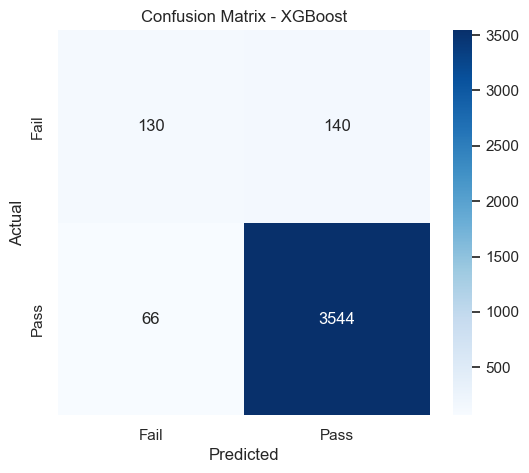

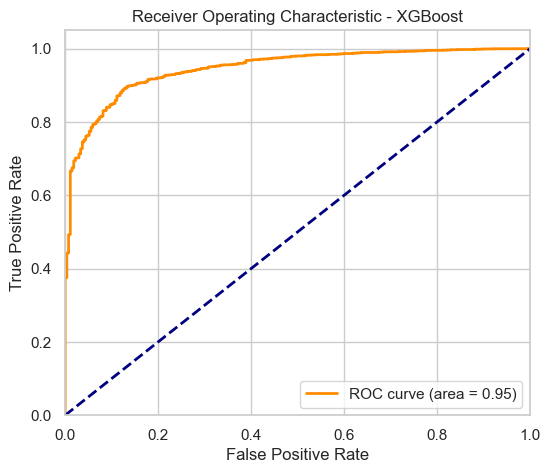


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       270
           1       0.96      0.98      0.97      3610

    accuracy                           0.95      3880
   macro avg       0.81      0.73      0.76      3880
weighted avg       0.94      0.95      0.94      3880



In [66]:
# Select the best model based on F1 score

best_model_name = results_df_bin.iloc[0]['Model']
best_model = best_models_bin[best_model_name]

print(f"Evaluating Best Model: {best_model_name}\n")

# Predictions
y_pred_best = best_model.predict(X_test_bin)
y_proba_best = best_model.predict_proba(X_test_bin)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic - {best_model_name}')
plt.legend(loc="lower right")
plt.show()

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_best))

#### 7. Regression Pipeline - Final Score

#### 7.1 building the pipeline

In [67]:
reg_models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {} # No hyperparams to tune really
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1.0]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoostRegressor': {
        'model': xgb.XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6]
        }
    }
}

best_models_reg = {}
results_reg = []

#### 7.2 Training and finding best parameters

In [68]:

print("Starting Regression Training and Tuning...\n")

for name, config in reg_models.items():
    print(f"Tuning {name}...")
    # Using negative MSE as scoring for sklearn
    reg = RandomizedSearchCV(config['model'], config['params'], n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    reg.fit(X_train_reg, y_train_reg)
    
    best_models_reg[name] = reg.best_estimator_
    
    # Predict
    y_pred = reg.predict(X_test_reg)
    
    # Metrics
    mse = mean_squared_error(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    results_reg.append({
        'Model': name,
        'Best Params': reg.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

# Create results dataframe
results_df_reg = pd.DataFrame(results_reg).sort_values(by='R2 Score', ascending=False)
display(results_df_reg)

Starting Regression Training and Tuning...

Tuning LinearRegression...
Tuning Ridge...
Tuning Lasso...
Tuning RandomForestRegressor...
Tuning XGBoostRegressor...


,Model,Best Params,MSE,MAE,R2 Score
2,Lasso,{'alpha': 0.01},28.020841,4.200402,0.772716
1,Ridge,{'alpha': 10.0},28.036011,4.200845,0.772593
0,LinearRegression,{},28.036232,4.200808,0.772591
4,XGBoostRegressor,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",28.699335,4.253870,0.767213
3,RandomForestRegressor,"{'n_estimators': 200, 'min_samples_split': 2, ...",30.291917,4.376258,0.754295


#### 7.3 Evaluation

Evaluating Best Regressor: Lasso



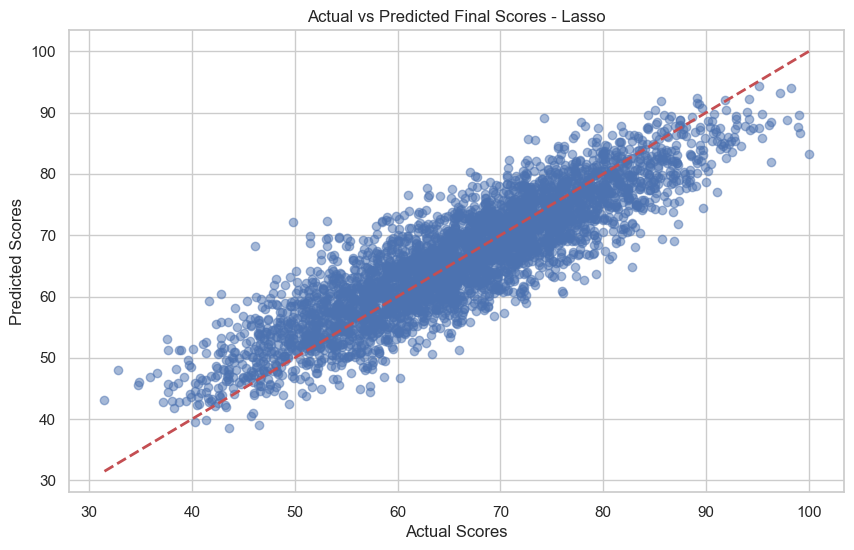

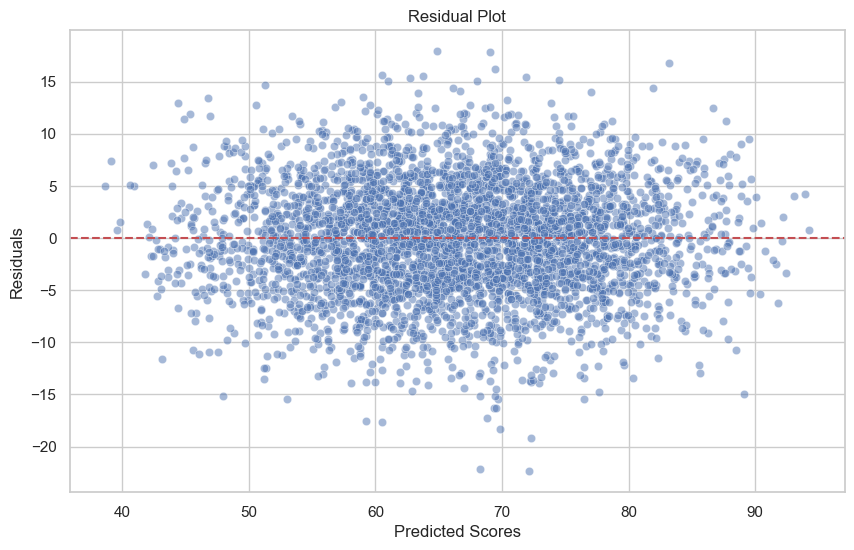

RMSE: 5.2935
R2 Score: 0.7727


In [69]:
# Select the best model based on R2 score
best_reg_name = results_df_reg.iloc[0]['Model']
best_reg_model = best_models_reg[best_reg_name]

print(f"Evaluating Best Regressor: {best_reg_name}\n")

y_pred_reg = best_reg_model.predict(X_test_reg)

# 1. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title(f'Actual vs Predicted Final Scores - {best_reg_name}')
plt.show()

# 2. Residual Plot
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_reg, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")

#### 7.4 Feature analysis

- their should be a clear relation between the results from the feature analysis and the correlation matrix

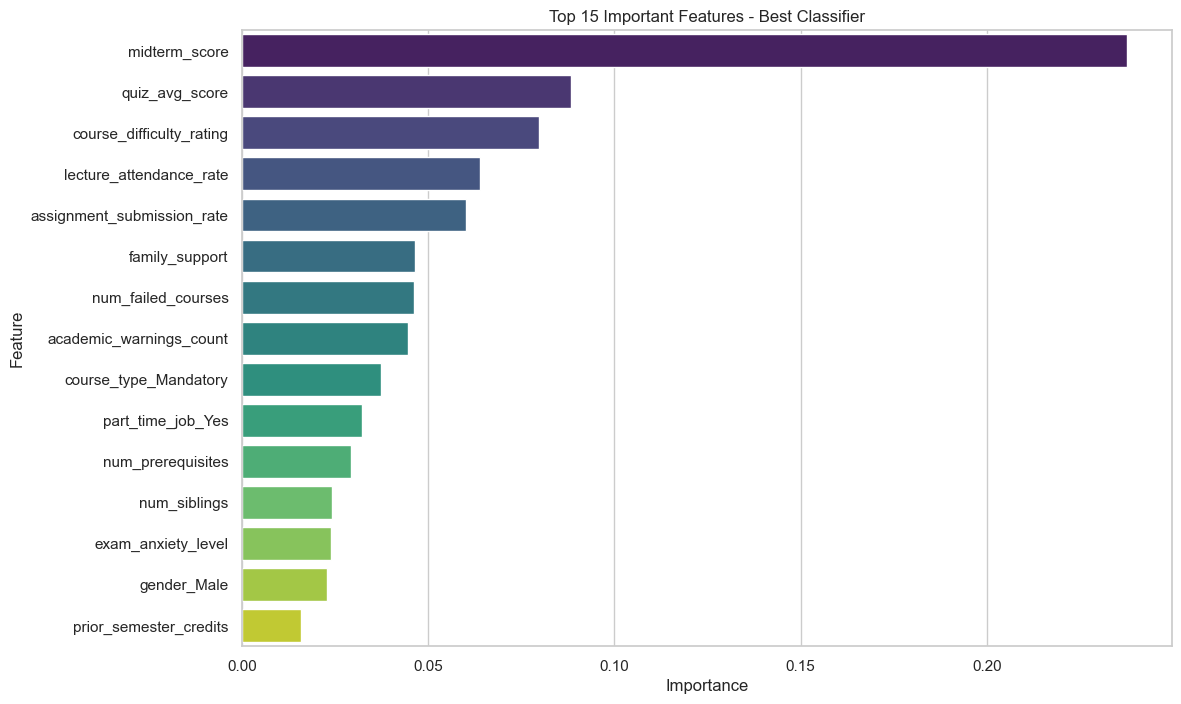


Top 10 Important Features:


,Feature,Importance
18,midterm_score,0.237710
17,quiz_avg_score,0.088353
31,course_difficulty_rating,0.079827
15,lecture_attendance_rate,0.064011
16,assignment_submission_rate,0.060293
3,family_support,0.046558
6,num_failed_courses,0.046097
14,academic_warnings_count,0.044669
37,course_type_Mandatory,0.037440
36,part_time_job_Yes,0.032344


In [70]:
model_to_analyze = None
if isinstance(best_model, (RandomForestClassifier, xgb.XGBClassifier)):
    model_to_analyze = best_model
    model_type = "Best Classifier"
else:
    # Fallback to the RandomForestClassifier trained earlier
    model_to_analyze = best_models_bin['RandomForest']
    model_type = "RandomForest Classifier"

# Get feature importances
importances = model_to_analyze.feature_importances_
feature_names = X_train_bin.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title(f'Top 15 Important Features - {model_type}')
plt.show()

print("\nTop 10 Important Features:")
display(feature_imp_df.head(10))

#### 8. Mulit-Classification - Final Grade

##### 8.1 Using XGBoost as multi-label classifier works best with tree based models and XGBoost is the best tree based model we used so far. but the model will perform poorly as their is huge class imbalance in the dataset in favour for C. So, Using oversampling and undersampling techniques we can balance the dataset and improve the model performance using "SMOTE".

Multi-Class Classification (Final Grade) Results:
Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

Accuracy: 0.6969072164948453

Classification Report:

              precision    recall  f1-score   support

           A       0.27      0.03      0.06       119
           B       0.00      0.00      0.00       650
           C       0.70      1.00      0.82      2712
           D       0.00      0.00      0.00       312
           F       0.00      0.00      0.00        87

    accuracy                           0.70      3880
   macro avg       0.19      0.21      0.18      3880
weighted avg       0.50      0.70      0.58      3880



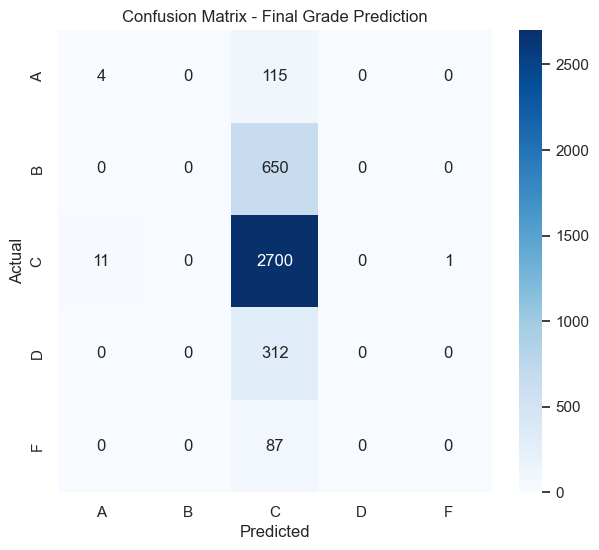

In [71]:
# Using XGBoost for the Multi-class problem (A, B, C, D, F)
xgb_multi = xgb.XGBClassifier(objective='multi:softmax', num_class=5, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define parameters
params_multi = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6]
}

grid_multi = GridSearchCV(xgb_multi, params_multi, cv=3, scoring='accuracy', n_jobs=-1)
grid_multi.fit(X_train_multi, y_train_multi)

best_multi = grid_multi.best_estimator_
y_pred_multi = best_multi.predict(X_test_multi)

# Evaluation
print("Multi-Class Classification (Final Grade) Results:")
print(f"Best Params: {grid_multi.best_params_}")
print("\nAccuracy:", accuracy_score(y_test_multi, y_pred_multi))
print("\nClassification Report:\n")
# Map back to letters for report
target_names = ['A', 'B', 'C', 'D', 'F']
print(classification_report(y_test_multi, y_pred_multi, target_names=target_names))

# Plot Confusion Matrix
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Final Grade Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 8.2 configured model

#### 8.2.1 Check the class distribution

In [73]:
print("Original Training Data Distribution (Count):")
print(y_train_multi.value_counts())
print("\nPercentages:")
print(y_train_multi.value_counts(normalize=True))

Original Training Data Distribution (Count):
target
2    10846
1     2600
3     1250
0      478
4      346
Name: count, dtype: int64

Percentages:
target
2    0.698840
1    0.167526
3    0.080541
0    0.030799
4    0.022294
Name: proportion, dtype: float64


#### 8.2.2 Apply SMOTE to Balance Multi-Class Data
- SMOTE will oversample the minority classes (A, B, D, F) to match the majority class (C)

In [74]:
smote_multi = SMOTE(random_state=42)

print("\nApplying SMOTE...")
X_train_multi_balanced, y_train_multi_balanced = smote_multi.fit_resample(X_train_multi, y_train_multi)

print("Balanced Training Data Distribution (Count):")
print(pd.Series(y_train_multi_balanced).value_counts())


Applying SMOTE...
Balanced Training Data Distribution (Count):
target
2    10846
1    10846
0    10846
3    10846
4    10846
Name: count, dtype: int64


#### 8.2.3 Define and Tune XGBoost with Macro-F1 Scoring
- We use 'f1_macro' as the scoring metric so the optimizer cares about minority classes

In [75]:
xgb_multi = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=5, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)

params_multi = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\nStarting Hyperparameter Tuning (optimizing for Macro F1)...")
grid_multi_balanced = GridSearchCV(
    xgb_multi, 
    params_multi, 
    cv=3, 
    scoring='f1_macro',  # important difference between this model and the previous: Optimizing for F1 instead of Accuracy
    n_jobs=-1, 
    verbose=1
)

grid_multi_balanced.fit(X_train_multi_balanced, y_train_multi_balanced)

best_multi_balanced = grid_multi_balanced.best_estimator_
y_pred_multi_balanced = best_multi_balanced.predict(X_test_multi)


Starting Hyperparameter Tuning (optimizing for Macro F1)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


#### 8.2.4 Evaluation


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}

--- Classification Report (Macro Avg) ---
              precision    recall  f1-score   support

           A       0.35      0.14      0.20       119
           B       0.35      0.04      0.08       650
           C       0.70      0.97      0.81      2712
           D       0.14      0.01      0.01       312
           F       0.40      0.07      0.12        87

    accuracy                           0.69      3880
   macro avg       0.39      0.25      0.24      3880
weighted avg       0.58      0.69      0.59      3880



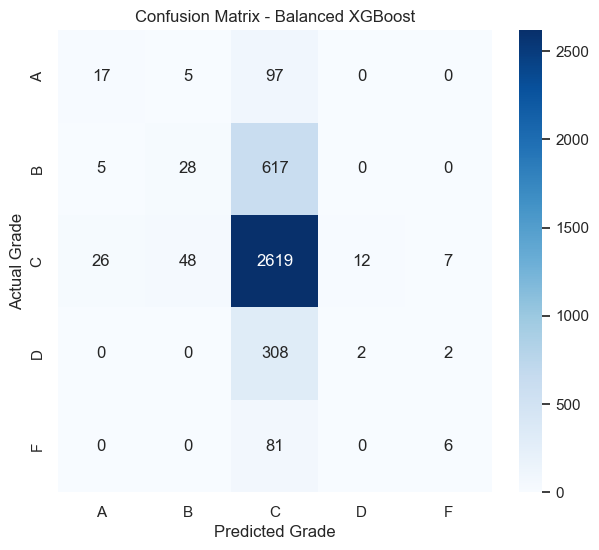

In [76]:
target_names = ['A', 'B', 'C', 'D', 'F']

print(f"\nBest Parameters: {grid_multi_balanced.best_params_}")
print("\n--- Classification Report (Macro Avg) ---")
print(classification_report(y_test_multi, y_pred_multi_balanced, target_names=target_names))

# Plot Confusion Matrix
cm_multi = confusion_matrix(y_test_multi, y_pred_multi_balanced)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Balanced XGBoost')
plt.ylabel('Actual Grade')
plt.xlabel('Predicted Grade')
plt.show()

#### The proposed stragey from ChatGPT

Initializing One-vs-Rest Random Forest with Balanced Weights...
Training model (this may take a moment)...

--- Classification Report (One-vs-Rest + Balanced Weights) ---
              precision    recall  f1-score   support

           A       0.38      0.13      0.19       119
           B       0.25      0.02      0.04       650
           C       0.70      0.98      0.82      2712
           D       0.40      0.01      0.01       312
           F       0.60      0.03      0.07        87

    accuracy                           0.69      3880
   macro avg       0.47      0.23      0.22      3880
weighted avg       0.59      0.69      0.59      3880



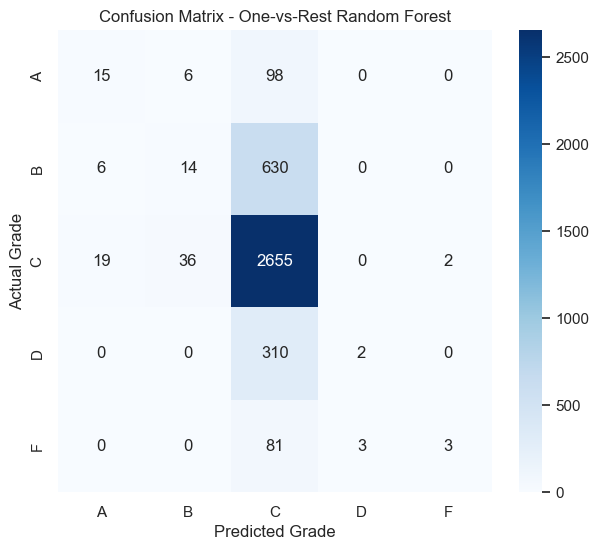

In [77]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# --- Why this strategy? ---
# 1. SMOTE created noise because A, B, and C students often have similar features.
# 2. XGBoost Softmax suppresses minority classes because of the probability sum constraint.
# 3. Solution: One-vs-Rest (trains 5 independent models) + Random Forest (natively handles imbalance via class weights).

print("Initializing One-vs-Rest Random Forest with Balanced Weights...")

# 1. Define the Base Model
# We use Random Forest with 'balanced' class weights.
# This tells the model: "If you misclassify a rare 'A', the penalty is huge."
rf_base = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced', # CRITICAL: Adjusts weights inversely proportional to class frequencies
    random_state=42,
    n_jobs=-1
)

# 2. Wrap it in One-vs-Rest
# This trains a separate classifier for each class (A, B, C, D, F)
# This prevents the majority class 'C' from suppressing the others.
ovr_classifier = OneVsRestClassifier(rf_base)

# 3. Train on the ORIGINAL (unbalanced) training data
# We use original data because class_weight handles the imbalance mathematically,
# avoiding the "synthetic noise" issue caused by SMOTE on overlapping classes.
print("Training model (this may take a moment)...")
ovr_classifier.fit(X_train_multi, y_train_multi)

# 4. Predict
y_pred_multi_ovr = ovr_classifier.predict(X_test_multi)

# --- Evaluation ---
target_names = ['A', 'B', 'C', 'D', 'F']

print("\n--- Classification Report (One-vs-Rest + Balanced Weights) ---")
print(classification_report(y_test_multi, y_pred_multi_ovr, target_names=target_names))

# --- Confusion Matrix ---
cm_multi = confusion_matrix(y_test_multi, y_pred_multi_ovr)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - One-vs-Rest Random Forest')
plt.ylabel('Actual Grade')
plt.xlabel('Predicted Grade')
plt.show()